# PyTorch

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Bild laden in Graustufen und anzeigen
img = cv2.imread("SchwarzerKreis.png", cv2.IMREAD_GRAYSCALE)

# 3x3 Binomialkernel bauen und normalisieren
binomial_kernel = torch.tensor([[1., 2., 1.],
                                [2., 4., 2.],
                                [1., 2., 1.]])
binomial_kernel = binomial_kernel / binomial_kernel.sum()

print("Binomial Kernel:")
print(binomial_kernel)

# # 2D Kernel mit outer product erstellen
# row = torch.tensor([1., 2., 1.])
# kernel2d = torch.outer(row, row)
# kernel2d = kernel2d / kernel2d.sum()

# print("2D Kernel using outer product:")
# print(kernel2d)

Binomial Kernel:
tensor([[0.0625, 0.1250, 0.0625],
        [0.1250, 0.2500, 0.1250],
        [0.0625, 0.1250, 0.0625]])


# Torch Tensor erzaeugen fuer das Bild
```
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
```

PyTorchs ``Conv2d`` erwartet die Form (Batch, Kanäle, Höhe, Breite). Das Graustufenbild hat lediglich N=1, C=1 → (1, 1, H, W)

- Nimmt das Bild-2D-Array (typisch ein NumPy-Array) und macht daraus ein Pytorch-Tensor vom Typ float32.
- ``unsqueeze(0)`` fügt erst vorne eine neue Dimension ein (Batch-Dimension)
- ``unsqueeze(0)`` fügt dann vorne eine neue Dimension ein (Kanal-Dimension)

In [5]:
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Torch Tensor erzaeugen fuer den Filter

In [6]:
kernel_tensor = torch.tensor(binomial_kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

C:\Users\adrianishak.duda\AppData\Local\Temp\ipykernel_14124\4099534764.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kernel_tensor = torch.tensor(binomial_kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)


# Bild Filtern

Text(0.5, 1.0, 'Smoothed Image')

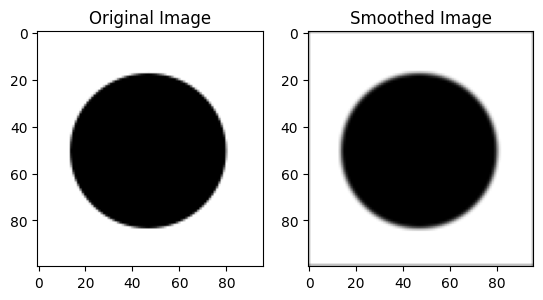

In [7]:
smoothed_img = F.conv2d(img_tensor, kernel_tensor, padding=1)
smoothed_img = smoothed_img.squeeze().numpy()  # Batch- und Kanal-Dimension

# Original und gefiltertes Bild anzeigen
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(smoothed_img, cmap='gray')
plt.title("Smoothed Image")

# Beispiel mit dem Laden von 2 Bildern und Filtern

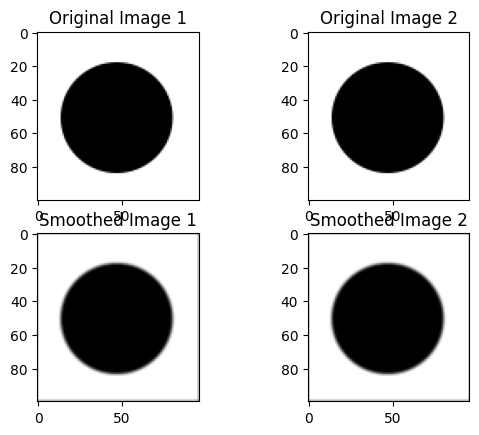

In [8]:
img1 = cv2.imread("SchwarzerKreis.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("SchwarzerKreis.png", cv2.IMREAD_GRAYSCALE)

imgs = [img1, img2]

imgs_tensor = torch.stack([torch.tensor(img, dtype=torch.float32).unsqueeze(0) for img in imgs])  # (N, 1, H, W)

smoothed_imgs = F.conv2d(imgs_tensor, kernel_tensor, padding=1)
smoothed_imgs = smoothed_imgs.squeeze().numpy()  # Batch- und Kanal-Dimension

# Original und gefiltertes Bild anzeigen
plt.figure()
for i in range(len(imgs)):
    plt.subplot(2, len(imgs), i + 1)
    plt.imshow(imgs[i], cmap='gray')
    plt.title(f"Original Image {i + 1}")
    plt.subplot(2, len(imgs), i + 1 + len(imgs))
    plt.imshow(smoothed_imgs[i], cmap='gray')
    plt.title(f"Smoothed Image {i + 1}")

# Sobel Filter in Torch

Sobel Kernel X:
torch.Size([3, 3])
Sobel Kernel Y:
torch.Size([3, 3])
Sobel Kernel X unsqueezed:
torch.Size([1, 1, 3, 3])
Sobel Kernel Y unsqueezed:
torch.Size([1, 1, 3, 3])


Text(0.5, 1.0, 'Sobel Y')

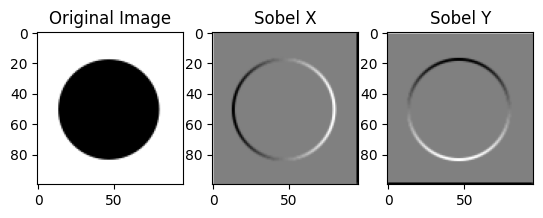

In [9]:
sobel_kernel_x = torch.tensor([[-1., 0., 1.],
                                [-2., 0., 2.],
                                [-1., 0., 1.]])
sobel_kernel_y = torch.tensor([[-1., -2., -1.],
                                [0., 0., 0.],
                                [1., 2., 1.]])

print("Sobel Kernel X:")
print(sobel_kernel_x.shape)
print("Sobel Kernel Y:")
print(sobel_kernel_y.shape)

sobel_kernel_x = sobel_kernel_x.unsqueeze(0).unsqueeze(0)
sobel_kernel_y = sobel_kernel_y.unsqueeze(0).unsqueeze(0)

print("Sobel Kernel X unsqueezed:")
print(sobel_kernel_x.shape)
print("Sobel Kernel Y unsqueezed:")
print(sobel_kernel_y.shape)

sobel_img_x = F.conv2d(img_tensor, sobel_kernel_x, padding=1).squeeze().numpy()
sobel_img_y = F.conv2d(img_tensor, sobel_kernel_y, padding=1).squeeze().numpy()

# Sobel Ergebnisse anzeigen
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(sobel_img_x, cmap='gray')
plt.title("Sobel X")
plt.subplot(1, 3, 3)
plt.imshow(sobel_img_y, cmap='gray')
plt.title("Sobel Y")


# Magnitude des Gradienten berechnen

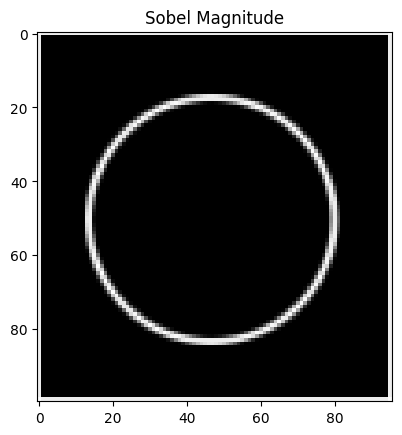

In [10]:
sobel_magnitude = np.sqrt(sobel_img_x**2 + sobel_img_y**2)
plt.figure()
plt.imshow(sobel_magnitude, cmap='gray')
plt.title("Sobel Magnitude")
plt.show()

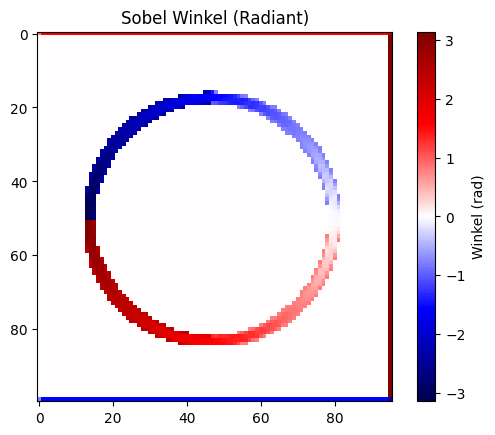

In [11]:
# WinkelInRadians coloriert rot blau mit Skala rechts

angle = np.arctan2(sobel_img_y, sobel_img_x)

plt.figure()
im = plt.imshow(angle, cmap='seismic', vmin=-np.pi, vmax=np.pi)
plt.title("Sobel Winkel (Radiant)")
cbar = plt.colorbar(im)
cbar.set_label("Winkel (rad)")
plt.show()


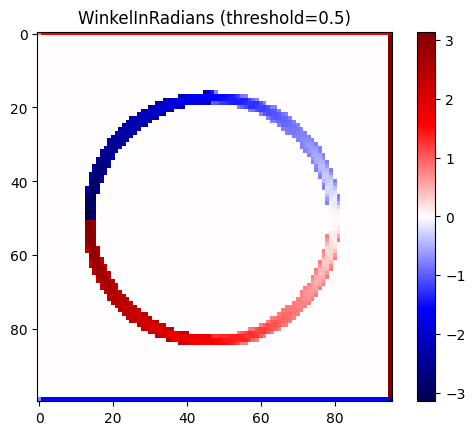

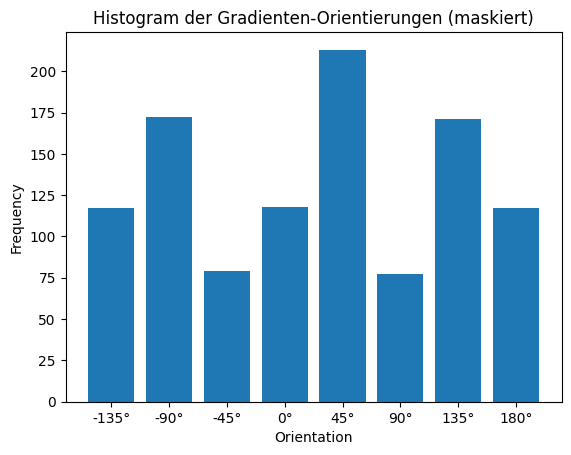

In [12]:
threshold = 0.5  # nur Winkel anzeigen, wo |Grad| >= 0.5

Gx_n = F.conv2d(img_tensor, sobel_kernel_x, padding=1).squeeze()
Gy_n = F.conv2d(img_tensor, sobel_kernel_y, padding=1).squeeze()

# 1) Betrag (Magnitude) und Winkel berechnen
mag   = torch.sqrt(Gx_n**2 + Gy_n**2)        # Wertebereich typischerweise 0..~1
angle = torch.atan2(Gy_n, Gx_n)              # Winkel in (-pi, pi]

# Boolean-Maske fuer starke Kanten
mask = mag >= threshold

# Variante A (vorher genutzt): torch.where -> erstellt neuen Tensor
# WinkelInRadians_where = torch.where(mask, angle, torch.zeros_like(angle))

# Variante B (kuerzer & klar): masked_fill -> fuellt alle NICHT maskierten Positionen mit 0
WinkelInRadians = angle.masked_fill(~mask, 0.0)

# Variante C (Indexierung):
# WinkelInRadians = angle.clone()
# WinkelInRadians[~mask] = 0.0

# Hinweis zu torch.masked_select:
# masked_select(mask) extrahiert NUR die True-Elemente und gibt einen 1D Tensor zurueck.
# Das eignet sich z.B. fuer Histogramme, aber NICHT um ein Bild mit gleicher 2D-Form zu behalten.
# Beispiel (siehe unten): valid_angles = angle.masked_select(mask)

A = WinkelInRadians.detach().cpu().numpy()  # (H, W) fuer Visualisierung

plt.figure()
plt.imshow(A, cmap='seismic', vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.title(f'WinkelInRadians (threshold={threshold})')
plt.show()

# Histogramm der Orientierungen nur dort, wo die Kante stark genug ist
# Nutzung von masked_select statt spaeterer NumPy-Filterung
valid_angles = angle.masked_select(mask).detach().cpu().numpy()

# 8 Orientierungs-Bins: (-135°, -90°, -45°, 0°, 45°, 90°, 135°, 180°]
bins = [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
hist, bin_edges = np.histogram(valid_angles, bins=bins)

plt.figure()
plt.bar(range(len(hist)), hist, width=0.8, align='center')
plt.xticks(range(len(hist)), ['-135°', '-90°', '-45°', '0°', '45°', '90°', '135°', '180°'])
plt.title('Histogram der Gradienten-Orientierungen (maskiert)')
plt.xlabel('Orientation')
plt.ylabel('Frequency')
plt.show()
